In [1]:
#importing libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import re
import string
import math
import nltk
from nltk.corpus import stopwords
import contractions
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer, WordNetLemmatizer
import re, string, unicodedata
from collections import  Counter
import spacy
from operator import itemgetter
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.decomposition import PCA
import fasttext
import fasttext.util
import string
from sklearn.decomposition import TruncatedSVD
from scipy.sparse import csr_matrix

%load_ext autotime

time: 426 µs (started: 2022-04-29 17:29:03 +05:30)


In [2]:
#Reading the data
data = pd.read_excel("supervised_classification_task.xlsx")
data

,comment,labels
0,recognizes some people are full power--self-di...,['appreciation']
1,recognizes some people are full power--self-di...,['appreciation']
2,stress on staff nurses to keep up with all cha...,['appreciation']
3,what is more meaningful to me is when the pati...,['appreciation']
4,lack of appreciation by many of our patients/f...,['appreciation']
...,...,...
19995,very strong,[]
19996,so many employees,[]
19997,they are brief yet informative,[]
19998,computer based instruction.,[]


time: 885 ms (started: 2022-04-29 17:29:04 +05:30)


In [3]:
#Shape of the Data
data.shape

(20000, 2)

time: 4.1 ms (started: 2022-04-29 17:29:06 +05:30)


In [4]:
#Information of the Data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   comment  20000 non-null  object
 1   labels   20000 non-null  object
dtypes: object(2)
memory usage: 312.6+ KB
time: 13.6 ms (started: 2022-04-29 17:29:06 +05:30)


In [5]:
#Sum of the Null values
data.isnull().sum()

comment    0
labels     0
dtype: int64

time: 9.8 ms (started: 2022-04-29 17:29:06 +05:30)


In [6]:
#Sum of the NaN values
data.isna().sum()

comment    0
labels     0
dtype: int64

time: 11.4 ms (started: 2022-04-29 17:29:07 +05:30)


In [7]:
#Unique length of the Data
data.nunique()

comment    19812
labels         2
dtype: int64

time: 18.4 ms (started: 2022-04-29 17:29:07 +05:30)


In [8]:
#Sum of the duplicated values
data.duplicated().sum()

188

time: 25.2 ms (started: 2022-04-29 17:29:07 +05:30)


In [9]:
#Type of Data
data.dtypes

comment    object
labels     object
dtype: object

time: 5.86 ms (started: 2022-04-29 17:29:07 +05:30)


<AxesSubplot:>

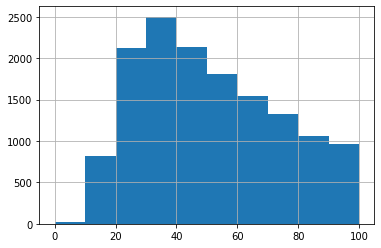

time: 135 ms (started: 2022-04-29 17:29:08 +05:30)


In [10]:
#Plot of words in each comment
data['comment'].str.len().hist(range = (0,100))

In [11]:
#Dropping duplicates
data.drop_duplicates(inplace=True)

time: 16.5 ms (started: 2022-04-29 17:29:08 +05:30)


In [12]:
#To remove brackets
def remove_square_brackets(labels):
    
    """ 
    input: takes original text string from data

    output:
    removes square brackets in the text present in the data

    """
    return re.sub(r"[\([{})\]]", "", labels)

time: 396 µs (started: 2022-04-29 17:29:08 +05:30)


In [13]:
#Removes brackets after removing URL in the same data
data['labels'] = data['labels'].apply(lambda x:remove_square_brackets(x))
data['labels'] 

0        'appreciation'
2        'appreciation'
3        'appreciation'
4        'appreciation'
5        'appreciation'
              ...      
19995                  
19996                  
19997                  
19998                  
19999                  
Name: labels, Length: 19812, dtype: object

time: 34.3 ms (started: 2022-04-29 17:29:08 +05:30)


In [14]:
#To remove punctuations
def remove_punctuation(data):
    
    """ 
    input: takes original text string 

    output:
    removes punctuations in the text 

    """
    punct = string.punctuation
    for c in punct:
        data = data.replace(c, "")
    return data

time: 430 µs (started: 2022-04-29 17:29:09 +05:30)


In [15]:
#Removes punctuations after removing brackets in the same data
data['comment']= data['comment'].apply(lambda x:remove_punctuation(x))
data['comment']

0        recognizes some people are full powerselfdirec...
2        stress on staff nurses to keep up with all cha...
3        what is more meaningful to me is when the pati...
4        lack of appreciation by many of our patientsfa...
5        my longevity with organization dedication and ...
                               ...                        
19995                                         very strong 
19996                                    so many employees
19997                       they are brief yet informative
19998                           computer based instruction
19999    they provide great encouragement to be product...
Name: comment, Length: 19812, dtype: object

time: 95.8 ms (started: 2022-04-29 17:29:09 +05:30)


In [16]:
#Removes punctuations after removing brackets in the same data
data['labels'] = data['labels'].apply(lambda x:remove_punctuation(x))
data['labels'] 

0        appreciation
2        appreciation
3        appreciation
4        appreciation
5        appreciation
             ...     
19995                
19996                
19997                
19998                
19999                
Name: labels, Length: 19812, dtype: object

time: 50.3 ms (started: 2022-04-29 17:29:09 +05:30)


In [17]:
#Applying Filter based conditions
da = data[(data['labels']=="appreciation")]
da

,comment,labels
0,recognizes some people are full powerselfdirec...,appreciation
2,stress on staff nurses to keep up with all cha...,appreciation
3,what is more meaningful to me is when the pati...,appreciation
4,lack of appreciation by many of our patientsfa...,appreciation
5,my longevity with organization dedication and ...,appreciation
...,...,...
9995,i feel properly appreciated,appreciation
9996,dan is one of the best men i know he constantl...,appreciation
9997,the members appreciation for the work that we ...,appreciation
9998,not being told i’m appreciated,appreciation


time: 7.64 ms (started: 2022-04-29 17:29:10 +05:30)


In [18]:
#Applying Filter based conditions
db = data[(data['labels']== "")]
db

,comment,labels
10000,very clientcustomer focused and doing things r...,
10001,careerbuilder responds very quickly to the cha...,
10002,pluralsight will do a good job of making money...,
10003,instill stronger externalcustomer focus in all...,
10004,very patientcustomer focused with a strong emp...,
...,...,...
19995,very strong,
19996,so many employees,
19997,they are brief yet informative,
19998,computer based instruction,


time: 14.7 ms (started: 2022-04-29 17:29:10 +05:30)


In [19]:
#Lowering the text
def text_lower(data):
    
    """ 
    input: takes original text string from the data

    output:
    lowers the text in the data

    """
    return data.lower()

time: 685 µs (started: 2022-04-29 17:29:10 +05:30)


In [20]:
#Lowers the text after removing spaces in the same data
data['comment']= data['comment'].apply(lambda x:text_lower(x))
data['comment']

0        recognizes some people are full powerselfdirec...
2        stress on staff nurses to keep up with all cha...
3        what is more meaningful to me is when the pati...
4        lack of appreciation by many of our patientsfa...
5        my longevity with organization dedication and ...
                               ...                        
19995                                         very strong 
19996                                    so many employees
19997                       they are brief yet informative
19998                           computer based instruction
19999    they provide great encouragement to be product...
Name: comment, Length: 19812, dtype: object

time: 17.8 ms (started: 2022-04-29 17:29:10 +05:30)


In [21]:
#contractions dictionary
contractions_dict = { "ain't": "are not","'s" :" is", "’s":" is", "aren't": "are not",
"can't": "cannot","can't've": "cannot have",
"'cause": "because","could've": "could have","couldn't": "could not",
"couldn't've": "could not have", "didn't": "did not","doesn't": "does not",
"don't": "do not","hadn't": "had not","hadn't've": "had not have",
"hasn't": "has not","haven't": "have not","he'd": "he would",
"he'd've": "he would have","he'll": "he will", "he'll've": "he will have",
"how'd": "how did","how'd'y": "how do you","how'll": "how will",
"I'd": "I would", "i'd": "I would","I'd've": "I would have","I'll": "I will",
"I'll've": "I will have","I'm": "I am","I've": "I have","i'm": "I am","i've": "I have", "isn't": "is not",
"it'd": "it would","it'd've": "it would have","it'll": "it will",
"it'll've": "it will have", "let's": "let us","ma'am": "madam",
"mayn't": "may not","might've": "might have","mightn't": "might not",
"mightn't've": "might not have","must've": "must have","mustn't": "must not",
"mustn't've": "must not have", "needn't": "need not",
"needn't've": "need not have","o'clock": "of the clock","oughtn't": "ought not",
"oughtn't've": "ought not have","shan't": "shall not","sha'n't": "shall not",
"shan't've": "shall not have","she'd": "she would","she'd've": "she would have",
"she'll": "she will", "she'll've": "she will have","should've": "should have",
"shouldn't": "should not", "shouldn't've": "should not have","so've": "so have",
"that'd": "that would","that'd've": "that would have", "there'd": "there would",
"there'd've": "there would have", "they'd": "they would",
"they'd've": "they would have","they'll": "they will",
"they'll've": "they will have", "they're": "they are","they've": "they have",
"to've": "to have","wasn't": "was not","we'd": "we would",
"we'd've": "we would have","we'll": "we will","we'll've": "we will have",
"we're": "we are","we've": "we have", "weren't": "were not","what'll": "what will",
"what'll've": "what will have","what're": "what are", "what've": "what have",
"when've": "when have","where'd": "where did", "where've": "where have",
"who'll": "who will","who'll've": "who will have","who've": "who have",
"why've": "why have","will've": "will have","won't": "will not",
"won't've": "will not have", "would've": "would have","wouldn't": "would not",
"wouldn't've": "would not have","y'all": "you all", "y'all'd": "you all would",
"y'all'd've": "you all would have","y'all're": "you all are",
"y'all've": "you all have", "you'd": "you would","you'd've": "you would have",
"you'll": "you will","you'll've": "you will have", "you're": "you are",
"you've": "you have"}

time: 3.47 ms (started: 2022-04-29 17:29:11 +05:30)


In [22]:
contractions_re=re.compile('(%s)' % '|'.join(contractions_dict.keys()))
# Function for expanding contractions
def expand_contractions(text,contractions_dict=contractions_dict):
    """ Args   
              text: takes original text string as input
        
        returns
              clean text with contractions removed
    
    """
    def replace(match):
        return contractions_dict[match.group(0)]
    return contractions_re.sub(replace, text)
data['comment']=data['comment'].apply(lambda x: expand_contractions(x))

time: 316 ms (started: 2022-04-29 17:29:11 +05:30)


In [23]:
#Lemmatizing the Data
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
nltk.download('omw-1.4')

word_lemmatizer = WordNetLemmatizer()
def lemmatizer(text):
     
    """ 
    input: takes original text string 

    output:
    lemmatized text

    """

    lemm_word=" ".join([word_lemmatizer.lemmatize(word) for word in text.split()])
    return lemm_word

time: 205 ms (started: 2022-04-29 17:29:11 +05:30)


[nltk_data] Downloading package wordnet to
[nltk_data]     /home/rutvathaker/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /home/rutvathaker/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [24]:
#Lemmatizing the data in the same data
data['comment']=data['comment'].apply(lambda x: lemmatizer(x))
data['comment']

0        recognizes some people are full powerselfdirec...
2        stress on staff nurse to keep up with all chan...
3        what is more meaningful to me is when the pati...
4        lack of appreciation by many of our patientsfa...
5        my longevity with organization dedication and ...
                               ...                        
19995                                          very strong
19996                                     so many employee
19997                       they are brief yet informative
19998                           computer based instruction
19999    they provide great encouragement to be product...
Name: comment, Length: 19812, dtype: object

time: 1.95 s (started: 2022-04-29 17:29:11 +05:30)


In [25]:
#Removing alphanumeric
data.comment = data.comment.str.replace('\d+', '')

time: 38.5 ms (started: 2022-04-29 17:29:13 +05:30)


/tmp/ipykernel_20478/2796641190.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  data.comment = data.comment.str.replace('\d+', '')


In [26]:
#Removing accent characters
re.sub("\d+", "", str(data['comment']))

'        recognizes some people are full powerselfdirec...\n        stress on staff nurse to keep up with all chan...\n        what is more meaningful to me is when the pati...\n        lack of appreciation by many of our patientsfa...\n        my longevity with organization dedication and ...\n                               ...                        \n                                          very strong\n                                     so many employee\n                       they are brief yet informative\n                           computer based instruction\n    they provide great encouragement to be product...\nName: comment, Length: , dtype: object'

time: 147 ms (started: 2022-04-29 17:29:13 +05:30)


In [27]:
#Getting a set of English stopWords by using nltk library
nltk.download('stopwords')
stopwords = nltk.corpus.stopwords.words('english')
stopwords[0:10]


[nltk_data] Downloading package stopwords to
[nltk_data]     /home/rutvathaker/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

time: 107 ms (started: 2022-04-29 17:29:13 +05:30)


In [28]:
#Getting words dictionary for stopwords
stopcorpus=[]
new= data['comment']
new=new.values
stopcorpus=[stopwords for i in new for word in i]

from collections import defaultdict
dic=defaultdict(int)
for word in stopcorpus:
    if word in stopwords:
        dic[word]+=1


time: 4.1 s (started: 2022-04-29 17:29:14 +05:30)


In [29]:
#Length of stopwords
len(stopcorpus)

1646516

time: 4.92 ms (started: 2022-04-29 17:29:18 +05:30)


/home/rutvathaker/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<Figure size 1440x576 with 0 Axes>

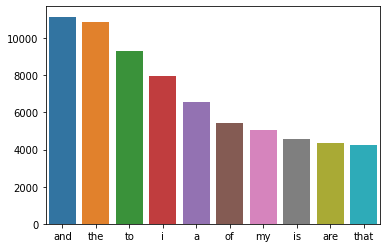

<Figure size 1440x576 with 0 Axes>

time: 694 ms (started: 2022-04-29 17:29:18 +05:30)


In [30]:
#plot for most occuring stopwords
stop=" ".join([i for i in data['comment'].values])
stop=" ".join([word for word in stop.split() if word in stopwords])

#Counting the StopWords
count={}
for word in stop.split():
    if word in count:
        count[word]+=1
    else:
        count[word]=1
count

#Plotting Barplot for most occuring StopWords by using stopwords dictionary
tw= dict(sorted(count.items(), key = itemgetter(1), reverse = True)[:10])
tw
sns.barplot(list(tw.keys()), list(tw.values()))
plt.figure(figsize=(20,8))



In [31]:
#Removing StopWords after replacing contractions in the same data
data['no_stopwords'] = data['comment'].apply(lambda x:' '.join([i for i in x.split() if i not in stopwords]))
data['no_stopwords']

0        recognizes people full powerselfdirected highl...
2        stress staff nurse keep change change type pat...
3         meaningful patientsfamily thanks u regarding job
4        lack appreciation many patientsfamilies try ha...
5        longevity organization dedication respect heal...
                               ...                        
19995                                               strong
19996                                        many employee
19997                                brief yet informative
19998                           computer based instruction
19999    provide great encouragement productive forward...
Name: no_stopwords, Length: 19812, dtype: object

time: 424 ms (started: 2022-04-29 17:29:18 +05:30)


In [32]:
data['no_stopwords'] = data['no_stopwords'].str.replace('[^\w\s]','')
data['no_stopwords']

/tmp/ipykernel_20478/1697667575.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  data['no_stopwords'] = data['no_stopwords'].str.replace('[^\w\s]','')


0        recognizes people full powerselfdirected highl...
2        stress staff nurse keep change change type pat...
3         meaningful patientsfamily thanks u regarding job
4        lack appreciation many patientsfamilies try ha...
5        longevity organization dedication respect heal...
                               ...                        
19995                                               strong
19996                                        many employee
19997                                brief yet informative
19998                           computer based instruction
19999    provide great encouragement productive forward...
Name: no_stopwords, Length: 19812, dtype: object

time: 20.9 ms (started: 2022-04-29 17:29:19 +05:30)


In [33]:
#Getting words dictionary without stopwords
corpus=[]
new= data['no_stopwords'].str.split()
new=new.values.tolist()
corpus=[word for i in new for word in i]

from collections import defaultdict
dic=defaultdict(int)
for word in corpus:
    if word in stopwords:
        dic[word]+=1

time: 517 ms (started: 2022-04-29 17:29:19 +05:30)


In [34]:
len(corpus)

154255

time: 3.29 ms (started: 2022-04-29 17:29:19 +05:30)


<AxesSubplot:>

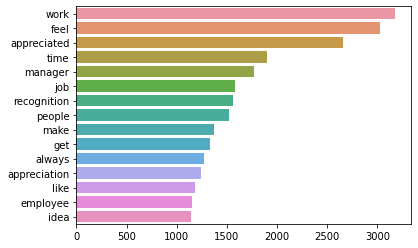

time: 277 ms (started: 2022-04-29 17:29:19 +05:30)


In [35]:
#Plot for most occuring words
counter=Counter(corpus)
most=counter.most_common()

x, y= [], []
for word,count in most[:15]:
        x.append(word)
        y.append(count)
        
sns.barplot(x=y,y=x)

In [36]:
#Finding sentence Length with Stopwords after lemmatizing in the same data
data['Sentence_length1'] = data["comment"].apply(lambda x: len(x.split()))
data['Sentence_length1'].sort_values()

19687     1
13560     1
14702     1
10390     1
11552     1
         ..
4286     97
5822     97
5183     97
3478     98
5971     98
Name: Sentence_length1, Length: 19812, dtype: int64

time: 27.5 ms (started: 2022-04-29 17:29:20 +05:30)


In [37]:
#Finding sentence Length without Stopwords after lemmatizing in the same data
data['Sentence_length0'] = data["no_stopwords"].apply(lambda x: len(x.split()))
data['Sentence_length0'].sort_values()

18193     0
19383     0
16114     0
12965     0
14050     0
         ..
19798    51
10745    52
3478     52
14138    53
19846    59
Name: Sentence_length0, Length: 19812, dtype: int64

time: 106 ms (started: 2022-04-29 17:29:20 +05:30)


In [38]:
#Reading the Data after preprocessing
data

,comment,labels,no_stopwords,Sentence_length1,Sentence_length0
0,recognizes some people are full powerselfdirec...,appreciation,recognizes people full powerselfdirected highl...,18,12
2,stress on staff nurse to keep up with all chan...,appreciation,stress staff nurse keep change change type pat...,52,26
3,what is more meaningful to me is when the pati...,appreciation,meaningful patientsfamily thanks u regarding job,23,6
4,lack of appreciation by many of our patientsfa...,appreciation,lack appreciation many patientsfamilies try ha...,16,9
5,my longevity with organization dedication and ...,appreciation,longevity organization dedication respect heal...,12,7
...,...,...,...,...,...
19995,very strong,,strong,2,1
19996,so many employee,,many employee,3,2
19997,they are brief yet informative,,brief yet informative,5,3
19998,computer based instruction,,computer based instruction,3,3


time: 145 ms (started: 2022-04-29 17:29:20 +05:30)


In [39]:
#Describing the comment column with stopwords
data['Sentence_length1'].describe()

count    19812.000000
mean        15.126338
std         13.323008
min          1.000000
25%          6.000000
50%         11.000000
75%         19.000000
max         98.000000
Name: Sentence_length1, dtype: float64

time: 102 ms (started: 2022-04-29 17:29:20 +05:30)


In [40]:
#Describing the comment column without stopwords
data['Sentence_length0'].describe()

count    19812.000000
mean         7.785938
std          6.529522
min          0.000000
25%          3.000000
50%          6.000000
75%         10.000000
max         59.000000
Name: Sentence_length0, dtype: float64

time: 93 ms (started: 2022-04-29 17:29:20 +05:30)


/home/rutvathaker/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Sentence_length1'>

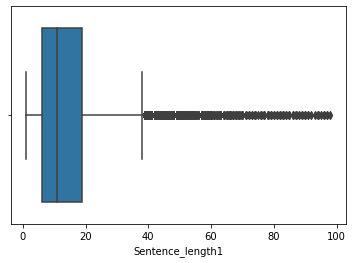

time: 198 ms (started: 2022-04-29 17:29:20 +05:30)


In [41]:
#boxplot for sentence length with stopwords to look for outliers
sns.boxplot(data['Sentence_length1'])

In [42]:
#Outlier data with stopwords
data.loc[data['Sentence_length1']>40]

,comment,labels,no_stopwords,Sentence_length1,Sentence_length0
2,stress on staff nurse to keep up with all chan...,appreciation,stress staff nurse keep change change type pat...,52,26
9,i believe the value at summa health system sta...,appreciation,believe value summa health system start tom st...,51,26
15,shortage of nursing staff to meet the need of...,appreciation,shortage nursing staff meet need homecare hosp...,44,25
17,probably discouragement not feeling valued the...,appreciation,probably discouragement feeling valued lot bui...,41,22
19,more recognition for job well done or when we ...,appreciation,recognition job well done break record amount ...,50,25
...,...,...,...,...,...
19846,me gustan porque tienen actividades pero algun...,,gustan porque tienen actividades pero algunas ...,63,59
19882,the attitude of personnelemployees there seems...,,attitude personnelemployees seems mentality wa...,52,22
19891,care about manager their mental health is a v...,,care manager mental health challenging store n...,77,35
19941,when first starting it would have been nice to...,,first starting would nice introduced people sm...,59,27


time: 9.75 ms (started: 2022-04-29 17:29:20 +05:30)


/home/rutvathaker/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Sentence_length0'>

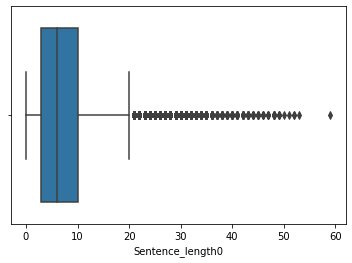

time: 181 ms (started: 2022-04-29 17:29:20 +05:30)


In [43]:
#boxplot for sentence length without stopwords  to look for outliers
sns.boxplot(data['Sentence_length0'])

In [44]:
#Outlier data without stopwords
data.loc[data['Sentence_length0']>20]

,comment,labels,no_stopwords,Sentence_length1,Sentence_length0
2,stress on staff nurse to keep up with all chan...,appreciation,stress staff nurse keep change change type pat...,52,26
9,i believe the value at summa health system sta...,appreciation,believe value summa health system start tom st...,51,26
15,shortage of nursing staff to meet the need of...,appreciation,shortage nursing staff meet need homecare hosp...,44,25
17,probably discouragement not feeling valued the...,appreciation,probably discouragement feeling valued lot bui...,41,22
19,more recognition for job well done or when we ...,appreciation,recognition job well done break record amount ...,50,25
...,...,...,...,...,...
19846,me gustan porque tienen actividades pero algun...,,gustan porque tienen actividades pero algunas ...,63,59
19882,the attitude of personnelemployees there seems...,,attitude personnelemployees seems mentality wa...,52,22
19891,care about manager their mental health is a v...,,care manager mental health challenging store n...,77,35
19941,when first starting it would have been nice to...,,first starting would nice introduced people sm...,59,27


time: 15.8 ms (started: 2022-04-29 17:29:21 +05:30)


In [45]:
#Getting unique words dictionary without stopwords
unique=[]
for word in corpus:
    if word not in unique:
        unique.append(word)

time: 2.43 s (started: 2022-04-29 17:29:21 +05:30)


In [46]:
#Length of unique words
len(unique)

10939

time: 1.8 ms (started: 2022-04-29 17:29:23 +05:30)


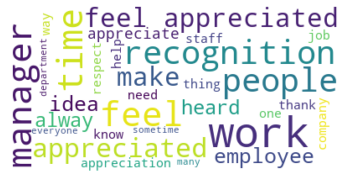

time: 796 ms (started: 2022-04-29 17:29:23 +05:30)


In [47]:
#WordCloud of the data with stopwords
word=" ".join(word for word in (data['comment'].values))
WC = WordCloud(max_font_size=50, max_words=30, background_color="White").generate(word)
plt.imshow(WC, interpolation = 'bilinear') 
plt.axis('off')
plt.show()


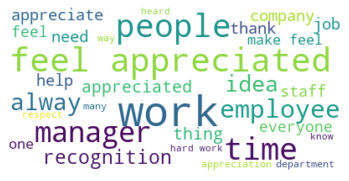

time: 890 ms (started: 2022-04-29 17:29:24 +05:30)


In [48]:
#WordCloud of the data without stopwords
word=" ".join(word for word in (data['no_stopwords'].values))
WC = WordCloud(max_font_size=50, max_words=30, background_color="White").generate(word)
plt.imshow(WC, interpolation = 'bilinear') 
plt.axis('off')
plt.show()


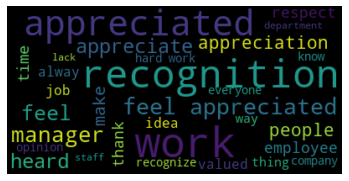

time: 464 ms (started: 2022-04-29 17:29:25 +05:30)


In [49]:
#WordCloud of the data with label appreciation
word=" ".join(word for word in (da['comment'].values))
WC = WordCloud(max_font_size=50, max_words=30, background_color="Black").generate(word)
plt.imshow(WC, interpolation = 'bilinear') 
plt.axis('off')
plt.show()


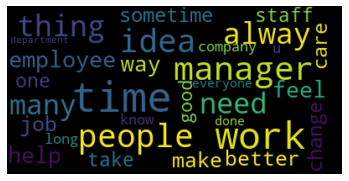

time: 393 ms (started: 2022-04-29 17:29:25 +05:30)


In [50]:
#WordCloud of the data with label blank
word=" ".join(word for word in (db['comment'].values))
WC = WordCloud(max_font_size=50, max_words=30, background_color="Black").generate(word)
plt.imshow(WC, interpolation = 'bilinear') 
plt.axis('off')
plt.show()

In [51]:
#Encoding the labels column
data['labels'] = preprocessing.LabelEncoder().fit_transform(data['labels'])
data

,comment,labels,no_stopwords,Sentence_length1,Sentence_length0
0,recognizes some people are full powerselfdirec...,1,recognizes people full powerselfdirected highl...,18,12
2,stress on staff nurse to keep up with all chan...,1,stress staff nurse keep change change type pat...,52,26
3,what is more meaningful to me is when the pati...,1,meaningful patientsfamily thanks u regarding job,23,6
4,lack of appreciation by many of our patientsfa...,1,lack appreciation many patientsfamilies try ha...,16,9
5,my longevity with organization dedication and ...,1,longevity organization dedication respect heal...,12,7
...,...,...,...,...,...
19995,very strong,0,strong,2,1
19996,so many employee,0,many employee,3,2
19997,they are brief yet informative,0,brief yet informative,5,3
19998,computer based instruction,0,computer based instruction,3,3


time: 19 ms (started: 2022-04-29 17:29:26 +05:30)


In [52]:
data.comment = data.comment.str.replace('\d+', '')

time: 119 ms (started: 2022-04-29 17:29:26 +05:30)


/tmp/ipykernel_20478/4181147059.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  data.comment = data.comment.str.replace('\d+', '')


# Feature Extraction using Tf-idf without Stopwords

## Accuracy of the model is higher without stopwords as observed

### Using Tf-idf without stopwords feature extraction technique is observed to have the highest accuracy in the Logistic Regression Model and SVM Model using kernel = ' sigmoid ' has the lowest accuracy

In [53]:
#Feature Extraction using tfidf without stopwords
docs = data['no_stopwords']
tfidf_vectorizer = TfidfVectorizer(stop_words = 'english') 
tfidf_vectorizer_vectors = tfidf_vectorizer.fit_transform(docs)
doct = tfidf_vectorizer_vectors.toarray()
doct
#docs = pd.DataFrame(doct, columns = ["Tfidf_Vectors"])
#docs

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

time: 572 ms (started: 2022-04-29 17:29:26 +05:30)


In [254]:
#Feature Extraction using tfidf without stopwords
docs = data['no_stopwords']
tfidf_vectorizer = TfidfVectorizer(stop_words = 'english') 
tfidf_vectorizer_vectors = tfidf_vectorizer.fit_transform(docs)
doct = tfidf_vectorizer_vectors

time: 177 ms (started: 2022-04-29 18:26:19 +05:30)


In [54]:
pca = PCA(n_components=5)
pca.fit(doct)
docs_pca = pca.fit_transform(doct)
docs_pca.shape

(19812, 5)

time: 21.1 s (started: 2022-04-29 17:29:36 +05:30)


In [246]:
svd = TruncatedSVD(n_components=3, n_iter=7, random_state=42)
svd.fit(doct)
svd_tfidf = svd.transform(doct)

time: 98.8 ms (started: 2022-04-29 18:25:45 +05:30)


In [247]:
svd_tfidf.shape

(19812, 3)

time: 1.62 ms (started: 2022-04-29 18:25:46 +05:30)


In [255]:
#Defining x & y
X = doct 
y = data['labels']
print(X.shape, y.shape)

(19812, 10744) (19812,)
time: 494 µs (started: 2022-04-29 18:26:29 +05:30)


In [256]:
#Splitting the data
X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.2, random_state=0, shuffle=True)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(15849, 10744) (15849,)
(3963, 10744) (3963,)
time: 6.73 ms (started: 2022-04-29 18:26:30 +05:30)


## Logistic Regression

In [267]:
#Fitting the Model
lr = LogisticRegression()
l_r = lr.fit(X_train, y_train)

time: 304 ms (started: 2022-04-29 18:29:54 +05:30)


In [268]:
#Predicting the test set result
y_pred_test = l_r.predict(X_test)

time: 3.07 ms (started: 2022-04-29 18:29:55 +05:30)


In [269]:
#accessing confusion matrix
c_matrix_test = confusion_matrix(y_test, y_pred_test)
print("Testing confusion matrix:", c_matrix_test)

Testing confusion matrix: [[1958   15]
 [  81 1909]]
time: 4.41 ms (started: 2022-04-29 18:29:56 +05:30)


In [270]:
#Accuracy score of the model
#print("\nTraining Accuracy score:",accuracy_score(y_train, y_pred_train))
print("Testing Accuracy score:",accuracy_score(y_test, y_pred_test))
print(classification_report(y_test, y_pred_test))

Testing Accuracy score: 0.975775927327782
              precision    recall  f1-score   support

           0       0.96      0.99      0.98      1973
           1       0.99      0.96      0.98      1990

    accuracy                           0.98      3963
   macro avg       0.98      0.98      0.98      3963
weighted avg       0.98      0.98      0.98      3963

time: 16.1 ms (started: 2022-04-29 18:29:58 +05:30)


## SVM

In [144]:
#Implementing SVM through SVC
svc=SVC(random_state=0)
svc.fit(X_train,y_train)

SVC(random_state=0)

time: 4.07 s (started: 2022-04-29 17:37:50 +05:30)


In [145]:
#Predicting the test set result
predict=svc.predict(X_test)

time: 1.01 s (started: 2022-04-29 17:37:54 +05:30)


In [146]:
#Creating confusion matrix
c_matrix_test = confusion_matrix(y_test, predict)
print("Testing confusion matrix:", c_matrix_test)

Testing confusion matrix: [[1746  227]
 [ 490 1500]]
time: 2.46 ms (started: 2022-04-29 17:37:55 +05:30)


In [147]:
#Accuracy Score of the model
print("Testing Accuracy score:",accuracy_score(y_test, predict))
print(classification_report(y_test, predict))

Testing Accuracy score: 0.8190764572293717
              precision    recall  f1-score   support

           0       0.78      0.88      0.83      1973
           1       0.87      0.75      0.81      1990

    accuracy                           0.82      3963
   macro avg       0.82      0.82      0.82      3963
weighted avg       0.82      0.82      0.82      3963

time: 105 ms (started: 2022-04-29 17:37:55 +05:30)


AttributeError: 'numpy.float64' object has no attribute 'toarray'

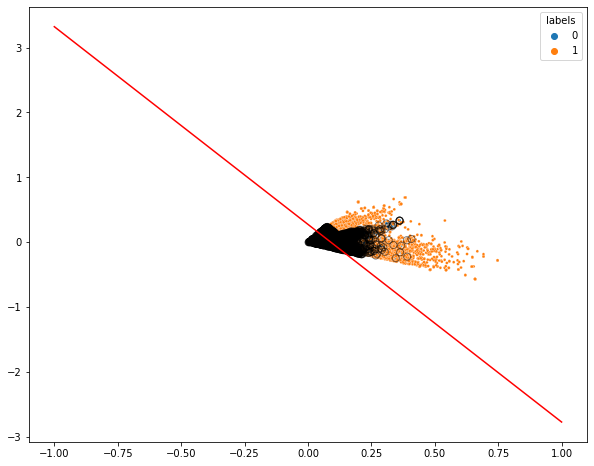

time: 544 ms (started: 2022-04-29 17:38:56 +05:30)


In [153]:
plt.figure(figsize=(10, 8))
# Plotting our two-features-space
sns.scatterplot(x=X_train[:, 0], 
                y=X_train[:, 1], 
                hue=y_train, 
                s=8);
# Constructing a hyperplane using a formula.
w = svclassifier.coef_[0]           # w consists of 2 elements
b = svclassifier.intercept_[0]      # b consists of 1 element
x_points = np.linspace(-1, 1)    # generating x-points from -1 to 1
y_points = -(w[0] / w[1]) * x_points - b / w[1]  # getting corresponding y-points
# Plotting a red hyperplane
plt.plot(x_points, y_points, c='r');
# Encircle support vectors
plt.scatter(svclassifier.support_vectors_[:, 0],
            svclassifier.support_vectors_[:, 1], 
            s=50, 
            facecolors='none', 
            edgecolors='k', 
            alpha=.5);
# Step 2 (unit-vector):
w_hat = svclassifier.coef_[0] / (np.sqrt(np.sum(svclassifier.coef_[0] ** 2))).reshape(-1, 1)
#print(w_hat)

# Step 3 (margin):
margin = 1 / np.sqrt(np.sum(svclassifier.coef_[0] ** 2))
margin = margin.toarray()
#margin = np.expand_dims(margin, axis=-1) 
# Step 4 (calculate points of the margin lines):
decision_boundary_points = np.array(list(zip(x_points, y_points)))
points_of_line_above = decision_boundary_points + w_hat * margin
points_of_line_below = decision_boundary_points - w_hat * margin
# Plot margin lines
# Blue margin line above
plt.plot(points_of_line_above[:, 0], 
         points_of_line_above[:, 1], 
         'b--', 
         linewidth=2)
# Green margin line below
plt.plot(points_of_line_below[:, 0], 
         points_of_line_below[:, 1], 
         'g--',
         linewidth=2)

## Applying SVM using Kernel = ' Linear '

In [149]:
#Applying SVM using Kernel='Linear'
svclassifier=SVC(kernel='linear')
svclassifier.fit(X_train,y_train)

SVC(kernel='linear')

time: 3.79 s (started: 2022-04-29 17:37:59 +05:30)


In [150]:
#Predicting the test set result
y_predict = svclassifier.predict(X_test)

time: 577 ms (started: 2022-04-29 17:38:04 +05:30)


In [151]:
#Evaluating the algorithm
print(confusion_matrix(y_test,y_predict))
print("Testing Accuracy score:",accuracy_score(y_test, y_predict))
print(classification_report(y_test,y_predict))

[[1650  323]
 [ 573 1417]]
Testing Accuracy score: 0.7739086550592985
              precision    recall  f1-score   support

           0       0.74      0.84      0.79      1973
           1       0.81      0.71      0.76      1990

    accuracy                           0.77      3963
   macro avg       0.78      0.77      0.77      3963
weighted avg       0.78      0.77      0.77      3963

time: 21.5 ms (started: 2022-04-29 17:38:06 +05:30)


## Applying SVM using Kernel = ' Polynomial '

In [154]:
#Applying SVM using Kernel='poly'
P_svclassifier=SVC(kernel='poly')
P_svclassifier.fit(X_train,y_train)

SVC(kernel='poly')

time: 4.47 s (started: 2022-04-29 17:39:55 +05:30)


In [155]:
#Predicting the test set result
y_prediction = P_svclassifier.predict(X_test)

time: 567 ms (started: 2022-04-29 17:40:00 +05:30)


In [156]:
#Evaluating the algorithm
print(confusion_matrix(y_test,y_prediction))
print("Testing Accuracy score:",accuracy_score(y_test, y_prediction))
print(classification_report(y_test,y_prediction))

[[1869  104]
 [ 763 1227]]
Testing Accuracy score: 0.781226343679031
              precision    recall  f1-score   support

           0       0.71      0.95      0.81      1973
           1       0.92      0.62      0.74      1990

    accuracy                           0.78      3963
   macro avg       0.82      0.78      0.78      3963
weighted avg       0.82      0.78      0.78      3963

time: 15.2 ms (started: 2022-04-29 17:40:01 +05:30)


## Applying SVM using Kernel = ' Gaussian or RBF '

In [157]:
#Applying SVM using Kernel='rbf'
G_svclassifier=SVC(kernel='rbf')
G_svclassifier.fit(X_train,y_train)

SVC()

time: 4.02 s (started: 2022-04-29 17:40:02 +05:30)


In [158]:
#Predicting the test set result
ypredict = G_svclassifier.predict(X_test)

time: 1.01 s (started: 2022-04-29 17:40:07 +05:30)


In [159]:
#Evaluating the algorithm
print(confusion_matrix(y_test,ypredict))
print("Testing Accuracy score:",accuracy_score(y_test, ypredict))
print(classification_report(y_test,ypredict))

[[1746  227]
 [ 490 1500]]
Testing Accuracy score: 0.8190764572293717
              precision    recall  f1-score   support

           0       0.78      0.88      0.83      1973
           1       0.87      0.75      0.81      1990

    accuracy                           0.82      3963
   macro avg       0.82      0.82      0.82      3963
weighted avg       0.82      0.82      0.82      3963

time: 12.1 ms (started: 2022-04-29 17:40:08 +05:30)


## Applying SVM using Kernel = ' Sigmoid '

In [160]:
#Applying SVM using Kernel='sigmoid'
S_svclassifier1=SVC(kernel='sigmoid')
S_svclassifier1.fit(X_train,y_train)

SVC(kernel='sigmoid')

time: 6.42 s (started: 2022-04-29 17:40:09 +05:30)


In [161]:
#Predicting the test set result
yprediction = S_svclassifier1.predict(X_test)

time: 1.11 s (started: 2022-04-29 17:40:17 +05:30)


In [162]:
#Evaluating the algorithm
print(confusion_matrix(y_test,yprediction))
print("Testing Accuracy score:",accuracy_score(y_test, yprediction))
print(classification_report(y_test,yprediction))

[[1172  801]
 [ 815 1175]]
Testing Accuracy score: 0.5922281100176634
              precision    recall  f1-score   support

           0       0.59      0.59      0.59      1973
           1       0.59      0.59      0.59      1990

    accuracy                           0.59      3963
   macro avg       0.59      0.59      0.59      3963
weighted avg       0.59      0.59      0.59      3963

time: 13.2 ms (started: 2022-04-29 17:40:18 +05:30)


## Decision Tree

In [163]:
#Fitting Decision Tree classifier to the training set  
classifier= DecisionTreeClassifier(random_state=0)  
classifier.fit(X_train, y_train)  

DecisionTreeClassifier(random_state=0)

time: 72.2 ms (started: 2022-04-29 17:40:20 +05:30)


In [164]:
#Predicting the test set result  
y_DTpredict= classifier.predict(X_test)  

time: 2.07 ms (started: 2022-04-29 17:40:21 +05:30)


In [165]:
#Evaluating the algorithm
print(confusion_matrix(y_test,y_DTpredict))
print("Testing Accuracy score:",accuracy_score(y_test, y_DTpredict))
print(classification_report(y_test,y_DTpredict))

[[1621  352]
 [ 391 1599]]
Testing Accuracy score: 0.812515770880646
              precision    recall  f1-score   support

           0       0.81      0.82      0.81      1973
           1       0.82      0.80      0.81      1990

    accuracy                           0.81      3963
   macro avg       0.81      0.81      0.81      3963
weighted avg       0.81      0.81      0.81      3963

time: 15.3 ms (started: 2022-04-29 17:40:22 +05:30)


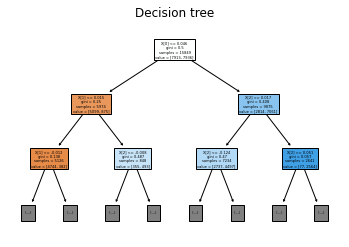

time: 526 ms (started: 2022-04-29 17:40:23 +05:30)


In [166]:
#Plotting Decision Tree
plt.figure()
plot_tree(classifier, filled=True, max_depth=2)
plt.title("Decision tree")
plt.show()

In [167]:
#Fitting Decision Tree classifier using entropy to the training set  
Eclassifier= DecisionTreeClassifier(criterion='entropy', random_state=0)  
Eclassifier.fit(X_train, y_train)  

DecisionTreeClassifier(criterion='entropy', random_state=0)

time: 88.9 ms (started: 2022-04-29 17:40:24 +05:30)


In [168]:
#Predicting the test set result  
y_DTpred= Eclassifier.predict(X_test)  

time: 2.87 ms (started: 2022-04-29 17:40:24 +05:30)


In [169]:
#Evaluating the algorithm
print(confusion_matrix(y_test,y_DTpred))
print("Testing Accuracy score:",accuracy_score(y_test, y_DTpred))
print(classification_report(y_test,y_DTpred))

[[1608  365]
 [ 375 1615]]
Testing Accuracy score: 0.8132727731516528
              precision    recall  f1-score   support

           0       0.81      0.82      0.81      1973
           1       0.82      0.81      0.81      1990

    accuracy                           0.81      3963
   macro avg       0.81      0.81      0.81      3963
weighted avg       0.81      0.81      0.81      3963

time: 15.6 ms (started: 2022-04-29 17:40:25 +05:30)


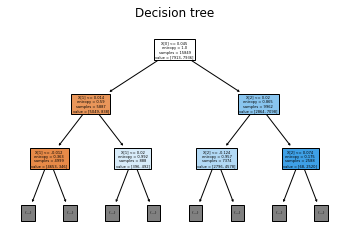

time: 539 ms (started: 2022-04-29 17:40:25 +05:30)


In [170]:
#Plotting Decision Tree using entropy 
plt.figure()
plot_tree(Eclassifier, filled=True, max_depth=2)
plt.title("Decision tree")
plt.show()

## KNN

Minimum error:- 0.14786777693666414 at K = 32


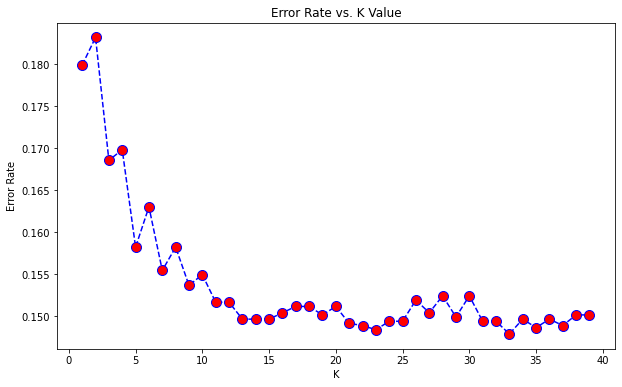

time: 4.8 s (started: 2022-04-29 17:40:26 +05:30)


In [171]:
#Finding Minimum error rate at k-value and plotting the graph
error_rate = []
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))
#Plotting the graph
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate)))

Maximum accuracy:- 0.8521322230633358 at K = 32


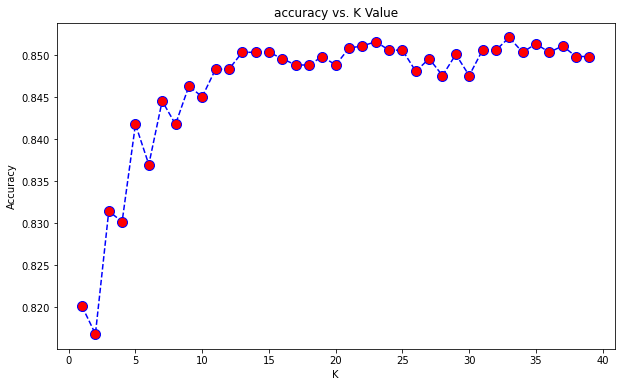

time: 4.73 s (started: 2022-04-29 17:40:32 +05:30)


In [172]:
#Finding highest accuracy rate at k-value and plotting the graph
acc = []
from sklearn import metrics
for i in range(1,40):
    neigh = KNeighborsClassifier(n_neighbors = i,).fit(X_train,y_train)
    yhat = neigh.predict(X_test)
    acc.append(metrics.accuracy_score(y_test, yhat))
#PLotting the graph    
plt.figure(figsize=(10,6))
plt.plot(range(1,40),acc,color = 'blue',linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')
print("Maximum accuracy:-",max(acc),"at K =",acc.index(max(acc)))

In [231]:
#Fitting K-NN classifier to the training set  
KNNclassifier= KNeighborsClassifier(n_neighbors=33)  
KNNclassifier.fit(X_train, y_train)  

KNeighborsClassifier(n_neighbors=33)

time: 15.7 ms (started: 2022-04-29 18:19:22 +05:30)


In [232]:
#Predicting the test set result  
y_KNNpred= KNNclassifier.predict(X_test)  

time: 136 ms (started: 2022-04-29 18:19:22 +05:30)


In [233]:
#Evaluating the algorithm
print(confusion_matrix(y_test,y_KNNpred))
print("Testing Accuracy score:",accuracy_score(y_test, y_KNNpred))
print(classification_report(y_test,y_KNNpred))

[[1683  290]
 [ 360 1630]]
Testing Accuracy score: 0.8359828412818572
              precision    recall  f1-score   support

           0       0.82      0.85      0.84      1973
           1       0.85      0.82      0.83      1990

    accuracy                           0.84      3963
   macro avg       0.84      0.84      0.84      3963
weighted avg       0.84      0.84      0.84      3963

time: 16.3 ms (started: 2022-04-29 18:19:23 +05:30)


In [234]:
def Accuracy_Model_score_tfidf():
    
    """
    print all the testing score of all the models
    
    """
    
    print("Testing Accuracy score of Logistic Regression Model :",accuracy_score(y_test, y_pred_test))
    print("Testing Accuracy score of SVM Model :",accuracy_score(y_test, predict))
    print("Testing Accuracy score of SVM Model using kernel = 'Linear':",accuracy_score(y_test, y_predict))
    print("Testing Accuracy score of SVM Model using kernel = 'Polynomial':",accuracy_score(y_test, y_prediction))
    print("Testing Accuracy score of SVM Model using kernel = 'RBF':",accuracy_score(y_test, ypredict))
    print("Testing Accuracy score of SVM Model using kernel = 'Sigmoid':",accuracy_score(y_test, yprediction))  
    print("Testing Accuracy score of Decision Tree Model:",accuracy_score(y_test, y_DTpredict))
    print("Testing Accuracy score of Decision Tree Model using Entropy :",accuracy_score(y_test, y_DTpred))
    print("Testing Accuracy score of KNN Model :",accuracy_score(y_test, y_KNNpred))
    

time: 805 µs (started: 2022-04-29 18:19:24 +05:30)


In [235]:
Accuracy_Model_score_tfidf()

Testing Accuracy score of Logistic Regression Model : 0.7703759777946001
Testing Accuracy score of SVM Model : 0.8155437799646732
Testing Accuracy score of SVM Model using kernel = 'Linear': 0.7726469846076205
Testing Accuracy score of SVM Model using kernel = 'Polynomial': 0.781226343679031
Testing Accuracy score of SVM Model using kernel = 'RBF': 0.8155437799646732
Testing Accuracy score of SVM Model using kernel = 'Sigmoid': 0.5616956850870553
Testing Accuracy score of Decision Tree Model: 0.782488014130709
Testing Accuracy score of Decision Tree Model using Entropy : 0.7887963663890991
Testing Accuracy score of KNN Model : 0.8359828412818572
time: 11.1 ms (started: 2022-04-29 18:19:25 +05:30)


In [271]:
#Giving input for the text and forming the dictionary for the topics and its coherence values and printing the score above 0.50
def get_prediction():
    
    """
    returns the predicted value
    
    """
    inp=str(input("enter comment to predict class "))
    inp=[inp]
    if l_r.predict(inp)==[0]:
        print("It belongs to class: [blank]")
    elif l_r.predict(inp)==[1]:
         print("It belongs to class: ['appreciation']")

time: 828 µs (started: 2022-04-29 18:30:57 +05:30)


In [272]:
get_prediction()

enter comment to predict class employees are appreciated


ValueError: Expected 2D array, got 1D array instead:
array=['employees are appreciated'].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

time: 12.7 s (started: 2022-04-29 18:30:58 +05:30)


## Feature Extraction using Tf-idf with Stopwords

### Accuracy decreases by adding stopwords as observed

### Using Tf-idf with stopwords feature extraction technique is observed to have the highest accuracy in the SVM Model using kernel = 'Linear' and SVM Model using kernel = ' sigmoid ' has the lowest accuracy

In [178]:
#Feature Extraction using tfidf without stopwords
docs = data['no_stopwords']
tfidf_vectorizer = TfidfVectorizer() 
tfidf_vectorizer_vectors = tfidf_vectorizer.fit_transform(docs)
docts = tfidf_vectorizer_vectors.toarray()
docts

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

time: 451 ms (started: 2022-04-29 17:41:09 +05:30)


In [179]:
pca = PCA(n_components=5)
pca.fit(docts)
docs_pca = pca.fit_transform(docts)
docs_pca.shape

(19812, 5)

time: 22.1 s (started: 2022-04-29 17:41:11 +05:30)


In [181]:
svd = TruncatedSVD(n_components=3, n_iter=7, random_state=42)
svd.fit(docts)
svd_tfidf = svd.transform(docts)

time: 9.53 s (started: 2022-04-29 17:41:46 +05:30)


In [182]:
#Defining x & y
X = svd_tfidf 
y = data['labels']
print(X.shape, y.shape)

(19812, 3) (19812,)
time: 4.54 ms (started: 2022-04-29 17:42:08 +05:30)


In [183]:
#Splitting the data
X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.2, random_state=0, shuffle=True)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(15849, 3) (15849,)
(3963, 3) (3963,)
time: 7.11 ms (started: 2022-04-29 17:42:08 +05:30)


## Logistic Regression

In [184]:
#Fitting the Model
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

time: 25.4 ms (started: 2022-04-29 17:42:10 +05:30)


In [185]:
#Predicting the test set result
y_pred_test = lr.predict(X_test)

time: 4.95 ms (started: 2022-04-29 17:42:11 +05:30)


In [186]:
#accessing confusion matrix
c_matrix_test = confusion_matrix(y_test, y_pred_test)
print("Testing confusion matrix:", c_matrix_test)

Testing confusion matrix: [[1643  330]
 [ 580 1410]]
time: 5.91 ms (started: 2022-04-29 17:42:11 +05:30)


In [187]:
#Accuracy score of the model
#print("\nTraining Accuracy score:",accuracy_score(y_train, y_pred_train))
print("Testing Accuracy score:",accuracy_score(y_test, y_pred_test))
print(classification_report(y_test, y_pred_test))

Testing Accuracy score: 0.7703759777946001
              precision    recall  f1-score   support

           0       0.74      0.83      0.78      1973
           1       0.81      0.71      0.76      1990

    accuracy                           0.77      3963
   macro avg       0.77      0.77      0.77      3963
weighted avg       0.77      0.77      0.77      3963

time: 20.7 ms (started: 2022-04-29 17:42:12 +05:30)


## SVM

In [188]:
#Implementing SVM through SVC
svc=SVC(random_state=0)
svc.fit(X_train,y_train)

SVC(random_state=0)

time: 4.1 s (started: 2022-04-29 17:42:14 +05:30)


In [189]:
#Predicting the test set result
predict=svc.predict(X_test)

time: 1.02 s (started: 2022-04-29 17:42:18 +05:30)


In [190]:
#Creating confusion matrix
c_matrix_test = confusion_matrix(y_test, predict)
print("Testing confusion matrix:", c_matrix_test)

Testing confusion matrix: [[1722  251]
 [ 480 1510]]
time: 2.28 ms (started: 2022-04-29 17:42:19 +05:30)


In [191]:
#Accuracy Score of the model
print("Testing Accuracy score:",accuracy_score(y_test, predict))
print(classification_report(y_test, predict))

Testing Accuracy score: 0.8155437799646732
              precision    recall  f1-score   support

           0       0.78      0.87      0.82      1973
           1       0.86      0.76      0.81      1990

    accuracy                           0.82      3963
   macro avg       0.82      0.82      0.82      3963
weighted avg       0.82      0.82      0.81      3963

time: 15.7 ms (started: 2022-04-29 17:42:19 +05:30)


In [192]:
z = X_train[:, 0]

time: 722 µs (started: 2022-04-29 17:42:20 +05:30)


## SVM using Kernel='Linear'

In [193]:
#Applying SVM using Kernel='Linear'
svclassifier=SVC(kernel='linear')
svclassifier.fit(X_train,y_train)

SVC(kernel='linear')

time: 3.84 s (started: 2022-04-29 17:42:21 +05:30)


In [194]:
#Predicting the test set result
y_predict = svclassifier.predict(X_test)

time: 599 ms (started: 2022-04-29 17:42:26 +05:30)


In [195]:
#Evaluating the algorithm
print(confusion_matrix(y_test,y_predict))
print("Testing Accuracy score:",accuracy_score(y_test, y_predict))
print(classification_report(y_test,y_predict))

[[1628  345]
 [ 556 1434]]
Testing Accuracy score: 0.7726469846076205
              precision    recall  f1-score   support

           0       0.75      0.83      0.78      1973
           1       0.81      0.72      0.76      1990

    accuracy                           0.77      3963
   macro avg       0.78      0.77      0.77      3963
weighted avg       0.78      0.77      0.77      3963

time: 11.8 ms (started: 2022-04-29 17:42:27 +05:30)


## SVM using Kernel='poly'

In [196]:
#Applying SVM using Kernel='poly'
P_svclassifier=SVC(kernel='poly')
P_svclassifier.fit(X_train,y_train)


SVC(kernel='poly')

time: 4.71 s (started: 2022-04-29 17:42:28 +05:30)


In [197]:
#Predicting the test set result
y_prediction = P_svclassifier.predict(X_test)

time: 562 ms (started: 2022-04-29 17:42:33 +05:30)


In [198]:
#Evaluating the algorithm
print(confusion_matrix(y_test,y_prediction))
print("Testing Accuracy score:",accuracy_score(y_test, y_prediction))
print(classification_report(y_test,y_prediction))

[[1846  127]
 [ 740 1250]]
Testing Accuracy score: 0.781226343679031
              precision    recall  f1-score   support

           0       0.71      0.94      0.81      1973
           1       0.91      0.63      0.74      1990

    accuracy                           0.78      3963
   macro avg       0.81      0.78      0.78      3963
weighted avg       0.81      0.78      0.78      3963

time: 18.3 ms (started: 2022-04-29 17:42:33 +05:30)


## SVM using Kernel='rbf'

In [199]:
#Applying SVM using Kernel='rbf'
G_svclassifier=SVC(kernel='rbf')
G_svclassifier.fit(X_train,y_train)

SVC()

time: 4.06 s (started: 2022-04-29 17:42:35 +05:30)


In [200]:
#Predicting the test set result
ypredict = G_svclassifier.predict(X_test)

time: 1.01 s (started: 2022-04-29 17:42:39 +05:30)


In [201]:
#Evaluating the algorithm
print(confusion_matrix(y_test,ypredict))
print("Testing Accuracy score:",accuracy_score(y_test, ypredict))
print(classification_report(y_test,ypredict))

[[1722  251]
 [ 480 1510]]
Testing Accuracy score: 0.8155437799646732
              precision    recall  f1-score   support

           0       0.78      0.87      0.82      1973
           1       0.86      0.76      0.81      1990

    accuracy                           0.82      3963
   macro avg       0.82      0.82      0.82      3963
weighted avg       0.82      0.82      0.81      3963

time: 19.1 ms (started: 2022-04-29 17:42:41 +05:30)


## SVM using Kernel='sigmoid'

In [202]:
#Applying SVM using Kernel='sigmoid'
S_svclassifier1=SVC(kernel='sigmoid')
S_svclassifier1.fit(X_train,y_train)

SVC(kernel='sigmoid')

time: 6.66 s (started: 2022-04-29 17:42:42 +05:30)


In [203]:
#Predicting the test set result
yprediction = S_svclassifier1.predict(X_test)

time: 1.22 s (started: 2022-04-29 17:42:49 +05:30)


In [204]:
#Evaluating the algorithm
print(confusion_matrix(y_test,yprediction))
print("Testing Accuracy score:",accuracy_score(y_test, yprediction))
print(classification_report(y_test,yprediction))

[[1114  859]
 [ 878 1112]]
Testing Accuracy score: 0.5616956850870553
              precision    recall  f1-score   support

           0       0.56      0.56      0.56      1973
           1       0.56      0.56      0.56      1990

    accuracy                           0.56      3963
   macro avg       0.56      0.56      0.56      3963
weighted avg       0.56      0.56      0.56      3963

time: 17.4 ms (started: 2022-04-29 17:42:52 +05:30)


## Decision Tree 

In [205]:
#Fitting Decision Tree classifier to the training set  
classifier= DecisionTreeClassifier(random_state=0)  
classifier.fit(X_train, y_train)  

DecisionTreeClassifier(random_state=0)

time: 70.8 ms (started: 2022-04-29 17:42:57 +05:30)


In [206]:
#Predicting the test set result  
y_DTpredict= classifier.predict(X_test)  

time: 4.17 ms (started: 2022-04-29 17:42:58 +05:30)


In [207]:
#Evaluating the algorithm
print(confusion_matrix(y_test,y_DTpredict))
print("Testing Accuracy score:",accuracy_score(y_test, y_DTpredict))
print(classification_report(y_test,y_DTpredict))

[[1526  447]
 [ 415 1575]]
Testing Accuracy score: 0.782488014130709
              precision    recall  f1-score   support

           0       0.79      0.77      0.78      1973
           1       0.78      0.79      0.79      1990

    accuracy                           0.78      3963
   macro avg       0.78      0.78      0.78      3963
weighted avg       0.78      0.78      0.78      3963

time: 16.3 ms (started: 2022-04-29 17:42:59 +05:30)


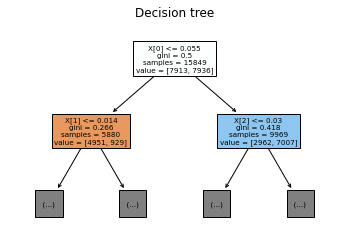

time: 276 ms (started: 2022-04-29 17:43:00 +05:30)


In [208]:
#Plotting Decision Tree
plt.figure()
plot_tree(classifier, filled=True, max_depth=1)
plt.title("Decision tree")
plt.show()

In [209]:
#Fitting Decision Tree classifier using entropy to the training set  
Eclassifier= DecisionTreeClassifier(criterion='entropy', random_state=0)  
Eclassifier.fit(X_train, y_train)  

DecisionTreeClassifier(criterion='entropy', random_state=0)

time: 95 ms (started: 2022-04-29 17:43:01 +05:30)


In [210]:
#Predicting the test set result  
y_DTpred= Eclassifier.predict(X_test)  

time: 3.24 ms (started: 2022-04-29 17:43:01 +05:30)


In [211]:
#Evaluating the algorithm
print(confusion_matrix(y_test,y_DTpred))
print("Testing Accuracy score:",accuracy_score(y_test, y_DTpred))
print(classification_report(y_test,y_DTpred))

[[1553  420]
 [ 417 1573]]
Testing Accuracy score: 0.7887963663890991
              precision    recall  f1-score   support

           0       0.79      0.79      0.79      1973
           1       0.79      0.79      0.79      1990

    accuracy                           0.79      3963
   macro avg       0.79      0.79      0.79      3963
weighted avg       0.79      0.79      0.79      3963

time: 18 ms (started: 2022-04-29 17:43:04 +05:30)


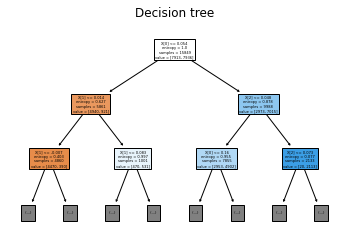

time: 528 ms (started: 2022-04-29 17:43:06 +05:30)


In [212]:
#Plotting Decision Tree using entropy
plt.figure()
plot_tree(Eclassifier, filled=True, max_depth=2)
plt.title("Decision tree")
plt.show()

## KNN

Minimum error:- 0.15997981327277316 at K = 20


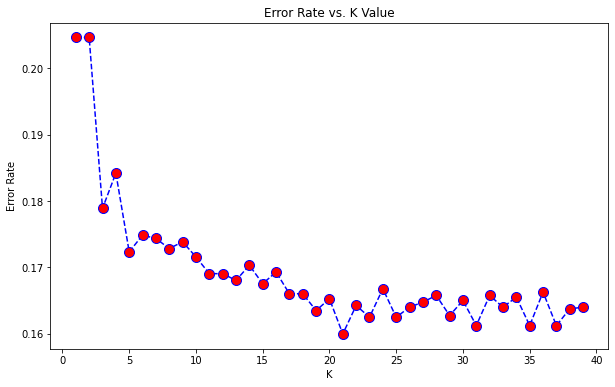

time: 4.72 s (started: 2022-04-29 17:43:08 +05:30)


In [213]:
#Finding Minimum error rate at k-value and plotting the graph
error_rate = []
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))
#Plotting the graph
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate)))

Maximum accuracy:- 0.8400201867272269 at K = 20


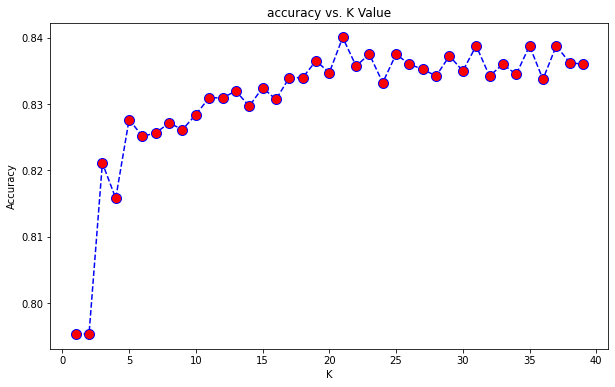

time: 4.73 s (started: 2022-04-29 17:44:49 +05:30)


In [217]:
#Finding highest accuracy rate at k-value and plotting the graph
acc = []
from sklearn import metrics
for i in range(1,40):
    neigh = KNeighborsClassifier(n_neighbors = i,).fit(X_train,y_train)
    yhat = neigh.predict(X_test)
    acc.append(metrics.accuracy_score(y_test, yhat))
#PLotting the graph    
plt.figure(figsize=(10,6))
plt.plot(range(1,40),acc,color = 'blue',linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')
print("Maximum accuracy:-",max(acc),"at K =",acc.index(max(acc)))

In [218]:
#Fitting K-NN classifier to the training set  
KNNclassifier= KNeighborsClassifier(n_neighbors=21)  
KNNclassifier.fit(X_train, y_train)  

KNeighborsClassifier(n_neighbors=21)

time: 16.2 ms (started: 2022-04-29 17:45:22 +05:30)


In [219]:
#Predicting the test set result  
y_KNNpred= KNNclassifier.predict(X_test)  

time: 126 ms (started: 2022-04-29 17:45:23 +05:30)


In [220]:
#Evaluating the algorithm
print(confusion_matrix(y_test,y_KNNpred))
print("Testing Accuracy score:",accuracy_score(y_test, y_KNNpred))
print(classification_report(y_test,y_KNNpred))

[[1688  285]
 [ 349 1641]]
Testing Accuracy score: 0.8400201867272269
              precision    recall  f1-score   support

           0       0.83      0.86      0.84      1973
           1       0.85      0.82      0.84      1990

    accuracy                           0.84      3963
   macro avg       0.84      0.84      0.84      3963
weighted avg       0.84      0.84      0.84      3963

time: 12.5 ms (started: 2022-04-29 17:45:24 +05:30)


In [221]:
#Printing all Models accuracy score
def Accuracy_Model_score_tfidfs():
    
    """
    print all the testing score of all the models
    
    """
    
    print("Testing Accuracy score of Logistic Regression Model :",accuracy_score(y_test, y_pred_test))
    print("Testing Accuracy score of SVM Model :",accuracy_score(y_test, predict))
    print("Testing Accuracy score of SVM Model using kernel = 'Linear':",accuracy_score(y_test, y_predict))
    print("Testing Accuracy score of SVM Model using kernel = 'Polynomial':",accuracy_score(y_test, y_prediction))
    print("Testing Accuracy score of SVM Model using kernel = 'RBF':",accuracy_score(y_test, ypredict))
    print("Testing Accuracy score of SVM Model using kernel = 'Sigmoid':",accuracy_score(y_test, yprediction))  
    print("Testing Accuracy score of Decision Tree Model:",accuracy_score(y_test, y_DTpredict))
    print("Testing Accuracy score of Decision Tree Model using Entropy :",accuracy_score(y_test, y_DTpred))
    print("Testing Accuracy score of KNN Model :",accuracy_score(y_test, y_KNNpred))
    

time: 1.17 ms (started: 2022-04-29 17:45:25 +05:30)


In [222]:
Accuracy_Model_score_tfidfs()

Testing Accuracy score of Logistic Regression Model : 0.7703759777946001
Testing Accuracy score of SVM Model : 0.8155437799646732
Testing Accuracy score of SVM Model using kernel = 'Linear': 0.7726469846076205
Testing Accuracy score of SVM Model using kernel = 'Polynomial': 0.781226343679031
Testing Accuracy score of SVM Model using kernel = 'RBF': 0.8155437799646732
Testing Accuracy score of SVM Model using kernel = 'Sigmoid': 0.5616956850870553
Testing Accuracy score of Decision Tree Model: 0.782488014130709
Testing Accuracy score of Decision Tree Model using Entropy : 0.7887963663890991
Testing Accuracy score of KNN Model : 0.8400201867272269
time: 14.1 ms (started: 2022-04-29 17:45:26 +05:30)


# Feature Extraction using Fastext

### Using fastext feature extraction technique, SVM Model has the highest accuracy and SVM Model using kernel sigmoid has the lowest accuracy 

In [141]:
#resetting Index
data.reset_index(level=0, inplace=True, drop=True)

time: 699 µs (started: 2022-04-28 16:54:12 +05:30)


In [142]:
data1= data[['no_stopwords', 'labels']]
#data1=pd.DataFrame()

time: 3.89 ms (started: 2022-04-28 16:54:13 +05:30)


In [143]:
data1.drop_duplicates(subset='no_stopwords', inplace=True)

time: 12.6 ms (started: 2022-04-28 16:54:14 +05:30)


/home/rutvathaker/.local/lib/python3.8/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [144]:
#data1['comments', 'labels']= data['no_stopwords', 'labels']
data1.to_csv('data_ft.csv',index=False)
data1
#data1.isna().sum()
#data1.isnull().sum()

,no_stopwords,labels
0,recognizes people full powerselfdirected highl...,1
1,stress staff nurse keep change change type pat...,1
2,meaningful patientsfamily thanks u regarding job,1
3,lack appreciation many patientsfamilies try ha...,1
4,longevity organization dedication respect heal...,1
...,...,...
19807,strong,0
19808,many employee,0
19809,brief yet informative,0
19810,computer based instruction,0


time: 49.2 ms (started: 2022-04-28 16:54:14 +05:30)


In [145]:
#resetting Index
data1.reset_index(level=0, inplace=True, drop=True)

time: 789 µs (started: 2022-04-28 16:54:14 +05:30)


In [146]:
data1.duplicated().sum()

0

time: 15.4 ms (started: 2022-04-28 16:54:15 +05:30)


In [147]:
data1['no_stopwords'].duplicated().sum()

0

time: 6.96 ms (started: 2022-04-28 16:54:15 +05:30)


In [148]:
model=fasttext.train_supervised('data_ft.csv')

time: 197 ms (started: 2022-04-28 16:54:16 +05:30)


Read 0M words
Number of words:  14349
Number of labels: 0
Progress: 100.0% words/sec/thread: 2861834 lr:  0.000000 avg.loss:      -nan ETA:   0h 0m 0s


In [149]:
def fasttext_sentence_vec(data,column):
    ft_sentence_dict={}
    for sentence in data[column]:
        #print(sentence)
        ft_sentence_dict[sentence]=model.get_sentence_vector(sentence)

    return ft_sentence_dict

fasttext_sentence_vec(data, column='no_stopwords')

{'recognizes people full powerselfdirected highly motivatedand doe burden noncustomer focused administrative task': array([-1.24845013e-03,  2.41162512e-03, -5.41697722e-04,  1.37811905e-04,
         6.06515241e-05,  1.24997355e-03, -1.38132705e-03,  2.18731794e-03,
         7.76937813e-04,  4.62256605e-04, -2.34147257e-04,  8.30047706e-04,
        -4.07485175e-04,  2.01897393e-03, -3.84941959e-04,  2.43003969e-03,
        -8.89554271e-04,  3.16004851e-03, -6.23883388e-05, -9.72095004e-04,
         6.67436980e-04,  9.11270035e-04, -9.42243423e-05, -2.23512249e-03,
         6.36750832e-04, -1.28921785e-03, -8.16771819e-04, -5.22183138e-04,
         5.04494761e-04,  1.62249093e-03, -1.54569373e-03, -4.74740693e-04,
        -1.36066379e-03,  8.86500755e-04,  6.09379553e-04,  3.38014401e-03,
        -1.01561553e-03, -1.30316461e-04, -2.82517821e-03,  2.57339561e-04,
        -1.56357884e-04, -1.38360867e-03,  2.67786114e-03,  2.41741608e-03,
        -2.44650873e-03, -8.47468735e-04,  1.1652

time: 890 ms (started: 2022-04-28 16:54:16 +05:30)


In [150]:
Sent_Vec = pd.DataFrame(fasttext_sentence_vec(data,column='no_stopwords').items(), columns = ('no_stopwords', 'vectors'))
Sent_Vec

,no_stopwords,vectors
0,recognizes people full powerselfdirected highl...,"[-0.0012484501, 0.002411625, -0.0005416977, 0...."
1,stress staff nurse keep change change type pat...,"[-0.0007579119, 0.0004517902, 0.0012823975, 0...."
2,meaningful patientsfamily thanks u regarding job,"[-0.0008171761, -0.0010558009, -0.0019428825, ..."
3,lack appreciation many patientsfamilies try ha...,"[-0.0015547932, -0.0019321371, -9.081192e-05, ..."
4,longevity organization dedication respect heal...,"[-0.0011382108, -0.00032689888, -5.2151096e-05..."
...,...,...
19159,strong,"[0.0005597472, 0.0054627806, -0.006671486, 0.0..."
19160,many employee,"[0.0006016623, 8.416999e-05, -0.0027482263, 0...."
19161,brief yet informative,"[0.0007370063, 0.005186987, -0.0024977587, 0.0..."
19162,computer based instruction,"[-0.0022884763, 0.0012669789, -0.0010356356, 0..."


time: 181 ms (started: 2022-04-28 16:54:17 +05:30)


In [151]:
split_sent_df = pd.DataFrame(Sent_Vec['vectors'].to_list())
word_vec_df=pd.concat([Sent_Vec['no_stopwords'],split_sent_df], axis=1)
word_vec_df

,no_stopwords,0,1,2,3,4,5,6,7,8,...,90,91,92,93,94,95,96,97,98,99
0,recognizes people full powerselfdirected highl...,-0.001248,0.002412,-0.000542,0.000138,0.000061,0.001250,-0.001381,0.002187,0.000777,...,0.000869,-0.001581,-0.000276,0.000150,-0.001728,-0.000992,0.001298,-0.000446,0.001002,-0.002028
1,stress staff nurse keep change change type pat...,-0.000758,0.000452,0.001282,0.000254,0.000763,-0.000274,-0.000195,-0.000010,0.000242,...,0.001365,0.000714,-0.000030,-0.001936,0.000582,0.000219,-0.000474,-0.001046,-0.000255,0.001565
2,meaningful patientsfamily thanks u regarding job,-0.000817,-0.001056,-0.001943,-0.002159,0.002285,0.002867,-0.001060,-0.000161,0.001054,...,0.002751,0.001010,0.005217,-0.002112,0.000115,-0.000635,0.003119,0.000028,-0.001948,0.000555
3,lack appreciation many patientsfamilies try ha...,-0.001555,-0.001932,-0.000091,0.000777,0.000593,-0.001507,-0.001531,-0.001558,0.001128,...,0.001505,0.000398,0.001113,-0.001875,-0.000524,-0.000129,-0.000361,-0.000783,0.000110,0.000894
4,longevity organization dedication respect heal...,-0.001138,-0.000327,-0.000052,-0.002363,0.001265,0.001534,0.000625,0.000601,0.002254,...,0.000109,0.001317,0.000763,-0.001170,0.000197,-0.000289,-0.002170,0.003164,0.002244,-0.002764
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19159,strong,0.000560,0.005463,-0.006671,0.001690,-0.000061,-0.004115,-0.000832,-0.004097,0.000106,...,0.007483,0.002201,0.000911,-0.009490,0.001796,-0.001429,0.000901,0.009119,-0.002121,0.000933
19160,many employee,0.000602,0.000084,-0.002748,0.003878,0.002419,0.003522,0.004305,-0.003826,0.003684,...,-0.002287,0.000218,0.002379,-0.008122,0.000911,-0.004008,0.001357,0.000573,0.002696,-0.002428
19161,brief yet informative,0.000737,0.005187,-0.002498,0.000727,0.002411,0.000289,0.000180,0.001300,0.003960,...,0.005372,0.003468,0.004910,-0.005184,0.001924,-0.003694,-0.002346,0.004350,0.000086,-0.002507
19162,computer based instruction,-0.002288,0.001267,-0.001036,0.001420,0.002272,0.001757,0.001206,0.002186,0.001807,...,0.007537,0.005545,0.002461,-0.002735,-0.002360,-0.001761,0.000464,0.005430,0.003062,-0.003409


time: 615 ms (started: 2022-04-28 16:54:19 +05:30)


### Using PCA by reducing parameters to 90%

In [152]:
#Standarizing the Data
data_std = StandardScaler().fit_transform(word_vec_df.iloc[:, 1:])
data_std.shape

(19164, 100)

time: 33.3 ms (started: 2022-04-28 16:54:20 +05:30)


In [153]:
#Covariance matrix using numpy
cov_matrix= np.cov(data_std,rowvar=False) 
cov_matrix

array([[ 1.00005219, -0.14711814,  0.1234907 , ..., -0.18999174,
         0.05825853,  0.01482429],
       [-0.14711814,  1.00005217, -0.12930834, ...,  0.16004755,
        -0.14109167, -0.1479432 ],
       [ 0.1234907 , -0.12930834,  1.00005217, ..., -0.09889062,
         0.13817862, -0.05814309],
       ...,
       [-0.18999174,  0.16004755, -0.09889062, ...,  1.00005219,
        -0.09048992,  0.08114768],
       [ 0.05825853, -0.14109167,  0.13817862, ..., -0.09048992,
         1.00005218,  0.09258501],
       [ 0.01482429, -0.1479432 , -0.05814309, ...,  0.08114768,
         0.09258501,  1.00005218]])

time: 19.8 ms (started: 2022-04-28 16:54:20 +05:30)


In [154]:
#Shape of the covariance matrix
cov_matrix.shape

(100, 100)

time: 4.14 ms (started: 2022-04-28 16:54:20 +05:30)


In [155]:
#Finding the 10 eigen values and its eigen vectors
from scipy.linalg import eigh
values, vectors = eigh(cov_matrix, eigvals=(90,99))
vectors = vectors.T

time: 54.5 ms (started: 2022-04-28 16:54:21 +05:30)


In [156]:
#Shape of the vector
vectors.shape

(10, 100)

time: 4.12 ms (started: 2022-04-28 16:54:21 +05:30)


In [157]:
#The projection matrix x from the selected 50 eigenvectors

matrix_x = np.matmul(vectors,data_std.T)
matrix_x.shape

(10, 19164)

time: 8.54 ms (started: 2022-04-28 16:54:21 +05:30)


In [158]:
#Projection Onto the New Feature Space with pca
fasttext = np.vstack((matrix_x)).T 

time: 5.59 ms (started: 2022-04-28 16:54:22 +05:30)


In [159]:
#Defining x & y
X = fasttext 
y = data1['labels']
print(X.shape, y.shape)

(19164, 10) (19164,)
time: 2.58 ms (started: 2022-04-28 16:54:22 +05:30)


In [160]:
#Splitting the data
X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.2, random_state=0, shuffle=True)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(15331, 10) (15331,)
(3833, 10) (3833,)
time: 8 ms (started: 2022-04-28 16:54:22 +05:30)


In [161]:
from sklearn.decomposition import TruncatedSVD
from scipy import sparse as sp
#Applying Truncated SVD:
svd = TruncatedSVD(n_components=2)
svd.fit(X_train)
svd.fit(X_test)

TruncatedSVD()

time: 82.3 ms (started: 2022-04-28 16:54:23 +05:30)


In [162]:
svd_X_train=svd.transform(X_train)
svd_X_test=svd.transform(X_test)

time: 4.43 ms (started: 2022-04-28 16:54:23 +05:30)


In [163]:
svd_X_train.shape

(15331, 2)

time: 3.95 ms (started: 2022-04-28 16:54:24 +05:30)


## Logistic Regression

In [164]:
#Fitting the Model
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

time: 35.9 ms (started: 2022-04-28 16:54:25 +05:30)


In [165]:
#Predicting the test set result
y_pred_test = lr.predict(X_test)

time: 11.8 ms (started: 2022-04-28 16:54:25 +05:30)


In [166]:
#accessing confusion matrix
c_matrix_test = confusion_matrix(y_test, y_pred_test)
print("Testing confusion matrix:", c_matrix_test)

Testing confusion matrix: [[1298  653]
 [ 579 1303]]
time: 11.6 ms (started: 2022-04-28 16:54:26 +05:30)


In [167]:
#Accuracy score of the model
#print("\nTraining Accuracy score:",accuracy_score(y_train, y_pred_train))
print("Testing Accuracy score:",accuracy_score(y_test, y_pred_test))
print(classification_report(y_test, y_pred_test))

Testing Accuracy score: 0.6785807461518393
              precision    recall  f1-score   support

           0       0.69      0.67      0.68      1951
           1       0.67      0.69      0.68      1882

    accuracy                           0.68      3833
   macro avg       0.68      0.68      0.68      3833
weighted avg       0.68      0.68      0.68      3833

time: 17.2 ms (started: 2022-04-28 16:54:26 +05:30)


## SVM

In [168]:
#Implementing SVM through SVC
svc=SVC(random_state=0)
svc.fit(X_train,y_train)

SVC(random_state=0)

time: 5.4 s (started: 2022-04-28 16:54:29 +05:30)


In [169]:
#Predicting the test set result
predict=svc.predict(X_test)

time: 1.28 s (started: 2022-04-28 16:54:34 +05:30)


In [170]:
#Creating confusion matrix
c_matrix_test = confusion_matrix(y_test, predict)
print("Testing confusion matrix:", c_matrix_test)

Testing confusion matrix: [[1609  342]
 [ 423 1459]]
time: 3.85 ms (started: 2022-04-28 16:54:35 +05:30)


In [171]:
#Accuracy Score of the model
print("Testing Accuracy score:",accuracy_score(y_test, predict))
print(classification_report(y_test, predict))

Testing Accuracy score: 0.8004174276024002
              precision    recall  f1-score   support

           0       0.79      0.82      0.81      1951
           1       0.81      0.78      0.79      1882

    accuracy                           0.80      3833
   macro avg       0.80      0.80      0.80      3833
weighted avg       0.80      0.80      0.80      3833

time: 151 ms (started: 2022-04-28 16:54:35 +05:30)


## Applying SVM using Kernel = ' Linear '

In [172]:
#Applying SVM using Kernel='Linear'
svclassifier=SVC(kernel='linear')
svclassifier.fit(X_train,y_train)

SVC(kernel='linear')

time: 16.8 s (started: 2022-04-28 16:54:36 +05:30)


In [173]:
#Predicting the test set result
y_predict = svclassifier.predict(X_test)

time: 815 ms (started: 2022-04-28 16:54:54 +05:30)


In [174]:
#Evaluating the algorithm
print(confusion_matrix(y_test,y_predict))
print("Testing Accuracy score:",accuracy_score(y_test, y_predict))
print(classification_report(y_test,y_predict))



[[1303  648]
 [ 565 1317]]
Testing Accuracy score: 0.6835376989303418
              precision    recall  f1-score   support

           0       0.70      0.67      0.68      1951
           1       0.67      0.70      0.68      1882

    accuracy                           0.68      3833
   macro avg       0.68      0.68      0.68      3833
weighted avg       0.68      0.68      0.68      3833

time: 18.6 ms (started: 2022-04-28 16:54:55 +05:30)


## Applying SVM using Kernel = ' Polynomial '

In [175]:
#Applying SVM using Kernel='poly'
P_svclassifier=SVC(kernel='poly')
P_svclassifier.fit(X_train,y_train)

SVC(kernel='poly')

time: 6.13 s (started: 2022-04-28 16:54:58 +05:30)


In [176]:
#Predicting the test set result
y_prediction = P_svclassifier.predict(X_test)

time: 771 ms (started: 2022-04-28 16:55:04 +05:30)


In [177]:
#Evaluating the algorithm
print(confusion_matrix(y_test,y_prediction))
print("Testing Accuracy score:",accuracy_score(y_test, y_prediction))
print(classification_report(y_test,y_prediction))

[[1700  251]
 [ 634 1248]]
Testing Accuracy score: 0.7691103574223845
              precision    recall  f1-score   support

           0       0.73      0.87      0.79      1951
           1       0.83      0.66      0.74      1882

    accuracy                           0.77      3833
   macro avg       0.78      0.77      0.77      3833
weighted avg       0.78      0.77      0.77      3833

time: 11.4 ms (started: 2022-04-28 16:55:05 +05:30)


## Applying SVM using Kernel = ' Gaussian or RBF '

In [178]:
#Applying SVM using Kernel='rbf'
G_svclassifier=SVC(kernel='rbf')
G_svclassifier.fit(X_train,y_train)

SVC()

time: 5.28 s (started: 2022-04-28 16:55:06 +05:30)


In [179]:
#Predicting the test set result
ypredict = G_svclassifier.predict(X_test)

time: 1.19 s (started: 2022-04-28 16:55:13 +05:30)


In [180]:
#Evaluating the algorithm
print(confusion_matrix(y_test,ypredict))
print("Testing Accuracy score:",accuracy_score(y_test, ypredict))
print(classification_report(y_test,ypredict))

[[1609  342]
 [ 423 1459]]
Testing Accuracy score: 0.8004174276024002
              precision    recall  f1-score   support

           0       0.79      0.82      0.81      1951
           1       0.81      0.78      0.79      1882

    accuracy                           0.80      3833
   macro avg       0.80      0.80      0.80      3833
weighted avg       0.80      0.80      0.80      3833

time: 17.1 ms (started: 2022-04-28 16:55:15 +05:30)


## Applying SVM using Kernel = ' Sigmoid '

In [181]:
#Applying SVM using Kernel='sigmoid'
S_svclassifier1=SVC(kernel='sigmoid')
S_svclassifier1.fit(X_train,y_train)

SVC(kernel='sigmoid')

time: 8.42 s (started: 2022-04-28 16:55:16 +05:30)


In [182]:
#Predicting the test set result
yprediction = S_svclassifier1.predict(X_test)

time: 1.42 s (started: 2022-04-28 16:55:25 +05:30)


In [183]:
#Evaluating the algorithm
print(confusion_matrix(y_test,yprediction))
print("Testing Accuracy score:",accuracy_score(y_test, yprediction))
print(classification_report(y_test,yprediction))

[[1059  892]
 [ 846 1036]]
Testing Accuracy score: 0.5465692668927733
              precision    recall  f1-score   support

           0       0.56      0.54      0.55      1951
           1       0.54      0.55      0.54      1882

    accuracy                           0.55      3833
   macro avg       0.55      0.55      0.55      3833
weighted avg       0.55      0.55      0.55      3833

time: 12.8 ms (started: 2022-04-28 16:55:26 +05:30)


## Decision Tree

In [184]:
#Fitting Decision Tree classifier to the training set  
classifier= DecisionTreeClassifier(random_state=0)  
classifier.fit(X_train, y_train)  

DecisionTreeClassifier(random_state=0)

time: 484 ms (started: 2022-04-28 16:55:26 +05:30)


In [185]:
#Predicting the test set result  
y_DTpredict= classifier.predict(X_test)  

time: 1.36 ms (started: 2022-04-28 16:55:27 +05:30)


In [186]:
#Evaluating the algorithm
print(confusion_matrix(y_test,y_DTpredict))
print("Testing Accuracy score:",accuracy_score(y_test, y_DTpredict))
print(classification_report(y_test,y_DTpredict))

[[1370  581]
 [ 550 1332]]
Testing Accuracy score: 0.7049308635533524
              precision    recall  f1-score   support

           0       0.71      0.70      0.71      1951
           1       0.70      0.71      0.70      1882

    accuracy                           0.70      3833
   macro avg       0.70      0.70      0.70      3833
weighted avg       0.71      0.70      0.70      3833

time: 17.6 ms (started: 2022-04-28 16:55:28 +05:30)


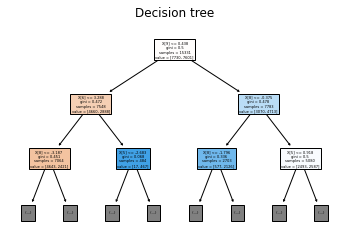

time: 512 ms (started: 2022-04-28 16:55:29 +05:30)


In [187]:
#Plotting Decision Tree
plt.figure()
plot_tree(classifier, filled=True, max_depth=2)
plt.title("Decision tree")
plt.show()

In [188]:
#Fitting Decision Tree using entropy classifier to the training set  
Eclassifier= DecisionTreeClassifier(criterion='entropy', random_state=0)  
Eclassifier.fit(X_train, y_train)  

DecisionTreeClassifier(criterion='entropy', random_state=0)

time: 318 ms (started: 2022-04-28 16:55:30 +05:30)


In [189]:
#Predicting the test set result  
y_DTpred= Eclassifier.predict(X_test)  

time: 5.11 ms (started: 2022-04-28 16:55:31 +05:30)


In [190]:
#Evaluating the algorithm
print(confusion_matrix(y_test,y_DTpred))
print("Testing Accuracy score:",accuracy_score(y_test, y_DTpred))
print(classification_report(y_test,y_DTpred))

[[1382  569]
 [ 535 1347]]
Testing Accuracy score: 0.7119749543438559
              precision    recall  f1-score   support

           0       0.72      0.71      0.71      1951
           1       0.70      0.72      0.71      1882

    accuracy                           0.71      3833
   macro avg       0.71      0.71      0.71      3833
weighted avg       0.71      0.71      0.71      3833

time: 15.9 ms (started: 2022-04-28 16:55:35 +05:30)


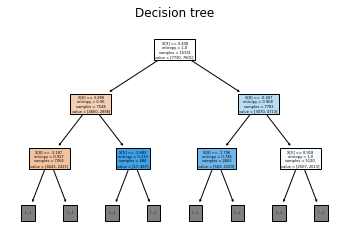

time: 513 ms (started: 2022-04-28 16:55:36 +05:30)


In [191]:
#Plotting Decision Tree using entropy 
plt.figure()
plot_tree(Eclassifier, filled=True, max_depth=2)
plt.title("Decision tree")
plt.show()

## KNN

Minimum error:- 0.2048004174276024 at K = 29


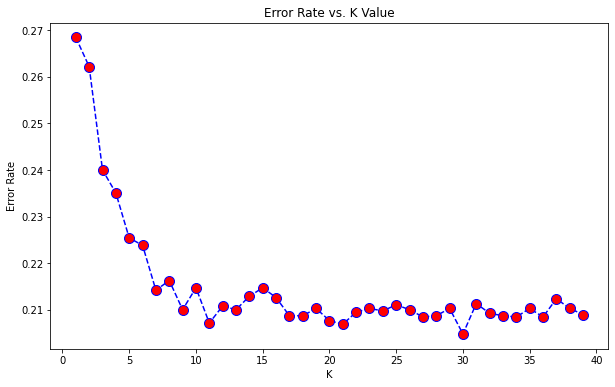

time: 23.6 s (started: 2022-04-28 16:55:38 +05:30)


In [192]:
#Finding Minimum error rate at k-value and plotting the graph
error_rate = []
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))
#Plotting the graph
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate)))

Maximum accuracy:- 0.7951995825723976 at K = 29


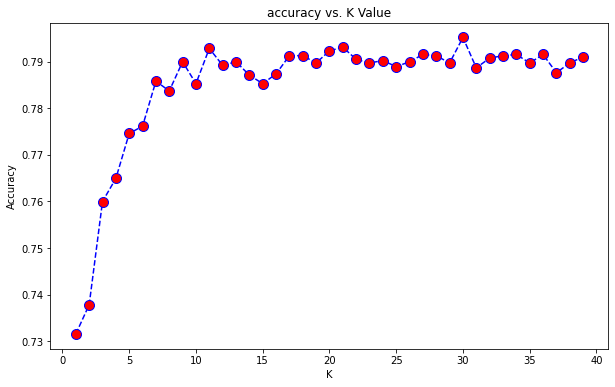

time: 26.1 s (started: 2022-04-28 16:56:02 +05:30)


In [193]:
#Finding highest accuracy rate at k-value and plotting the graph
acc = []
from sklearn import metrics
for i in range(1,40):
    neigh = KNeighborsClassifier(n_neighbors = i,).fit(X_train,y_train)
    yhat = neigh.predict(X_test)
    acc.append(metrics.accuracy_score(y_test, yhat))
#PLotting the graph    
plt.figure(figsize=(10,6))
plt.plot(range(1,40),acc,color = 'blue',linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')
print("Maximum accuracy:-",max(acc),"at K =",acc.index(max(acc)))

In [194]:
#Fitting K-NN classifier to the training set  
KNNclassifier= KNeighborsClassifier(n_neighbors=29)  
KNNclassifier.fit(X_train, y_train)  

KNeighborsClassifier(n_neighbors=29)

time: 29 ms (started: 2022-04-28 16:57:07 +05:30)


In [195]:
#Predicting the test set result  
y_KNNpred= KNNclassifier.predict(X_test)  

time: 671 ms (started: 2022-04-28 16:57:08 +05:30)


In [196]:
#Evaluating the algorithm
print(confusion_matrix(y_test,y_KNNpred))
print("Testing Accuracy score:",accuracy_score(y_test, y_KNNpred))
print(classification_report(y_test,y_KNNpred))

[[1640  311]
 [ 495 1387]]
Testing Accuracy score: 0.7897208452908948
              precision    recall  f1-score   support

           0       0.77      0.84      0.80      1951
           1       0.82      0.74      0.77      1882

    accuracy                           0.79      3833
   macro avg       0.79      0.79      0.79      3833
weighted avg       0.79      0.79      0.79      3833

time: 18 ms (started: 2022-04-28 16:57:09 +05:30)


In [197]:
#Printing all models accuracy score
def Accuracy_Model_score_FastText():
    
    """
    print all the testing score of all the models
    
    """
    
    print("Testing Accuracy score of Logistic Regression Model :",accuracy_score(y_test, y_pred_test))
    print("Testing Accuracy score of SVM Model :",accuracy_score(y_test, predict))
    print("Testing Accuracy score of SVM Model using kernel = 'Linear':",accuracy_score(y_test, y_predict))
    print("Testing Accuracy score of SVM Model using kernel = 'Polynomial':",accuracy_score(y_test, y_prediction))
    print("Testing Accuracy score of SVM Model using kernel = 'RBF':",accuracy_score(y_test, ypredict))
    print("Testing Accuracy score of SVM Model using kernel = 'Sigmoid':",accuracy_score(y_test, yprediction))  
    print("Testing Accuracy score of Decision Tree Model:",accuracy_score(y_test, y_DTpredict))
    print("Testing Accuracy score of Decision Tree Model using Entropy :",accuracy_score(y_test, y_DTpred))
    print("Testing Accuracy score of KNN Model :",accuracy_score(y_test, y_KNNpred))
    

time: 1.11 ms (started: 2022-04-28 16:57:12 +05:30)


In [198]:
Accuracy_Model_score_FastText()

Testing Accuracy score of Logistic Regression Model : 0.6785807461518393
Testing Accuracy score of SVM Model : 0.8004174276024002
Testing Accuracy score of SVM Model using kernel = 'Linear': 0.6835376989303418
Testing Accuracy score of SVM Model using kernel = 'Polynomial': 0.7691103574223845
Testing Accuracy score of SVM Model using kernel = 'RBF': 0.8004174276024002
Testing Accuracy score of SVM Model using kernel = 'Sigmoid': 0.5465692668927733
Testing Accuracy score of Decision Tree Model: 0.7049308635533524
Testing Accuracy score of Decision Tree Model using Entropy : 0.7119749543438559
Testing Accuracy score of KNN Model : 0.7897208452908948
time: 13.7 ms (started: 2022-04-28 16:57:17 +05:30)
